In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append('../')

In [3]:
from ConformalMethods import AdaptiveCP, ACP_data, ACP_plots

### I want to investigate how ACI performance varies with different lookback windows. This will help me understand how a scaled lookback and ACI would work together.

I hypothesis that the smaller the lookback, the aci will perform best with a smaller gamma as it will natrually not need to correct itself as much.

In [7]:
ACP = AdaptiveCP(0.3)

In [4]:
no_shift_data = ACP_data.no_shift(seq_length=500, datapoints=1)

In [5]:
def dt_data_as_dependent(all_data):
    num_trials = 10
    lookbacks = np.linspace(10, 200, num_trials).astype(int)

    cov_track = [[] for _ in range(num_trials)]
    interval_track = [[] for _ in range(num_trials)]

    try: 
        for data in all_data:
            aci_different_lookback = [ACP.DtACI(data, custom_interval=int(lookback), title=str(lookback)) for lookback in lookbacks]
            for i, data in enumerate(aci_different_lookback):
                cov_track[i].append(data['realised_interval_coverage'])
                interval_track[i].append(data['average_prediction_interval'])

    except KeyboardInterrupt:
        pass

    mean_cov = [np.mean(cov) for cov in cov_track]
    mean_interval = [np.mean(interval) for interval in interval_track]

    # Create a scatter plot
    plt.scatter(mean_cov, mean_interval)

    # Label the points
    for i in range(len(lookbacks)):
        plt.annotate(str(lookbacks[i]), (mean_cov[i], mean_interval[i]))

    # Add x and y labels
    plt.xlabel('mean_cov')
    plt.ylabel('mean_interval')

    # Show the plot
    plt.show()

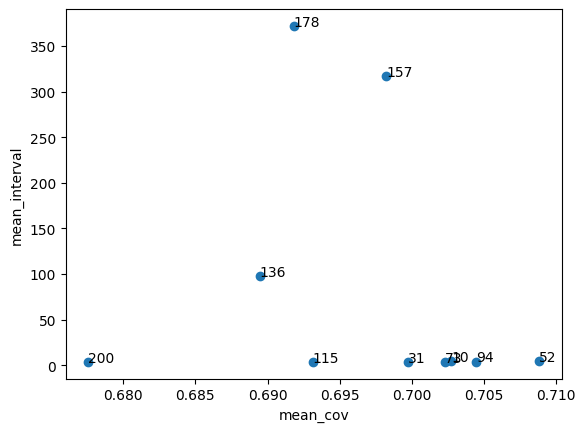

In [6]:
dt_data_as_dependent(no_shift_data)

## Now to test on single shift data

In [11]:
single_shift_data = ACP_data.single_shift((0,1), (4, 2), seq_length=500, shift_point=250, datapoints=1)

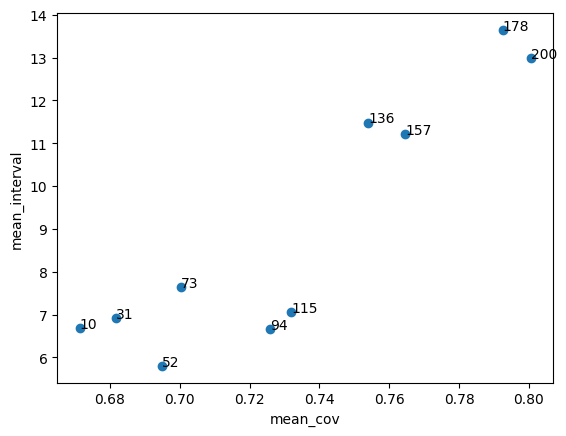

In [12]:
dt_data_as_dependent(single_shift_data)

In [14]:
import concurrent.futures

def dt_data_as_dependent_con(all_data):
    num_trials = 10
    lookbacks = np.linspace(10, 200, num_trials).astype(int)

    cov_track = [[] for _ in range(num_trials)]
    interval_track = [[] for _ in range(num_trials)]

    try: 
        for data in all_data:
            with concurrent.futures.ThreadPoolExecutor() as executor:
                aci_different_lookback = list(executor.map(lambda lookback: ACP.DtACI(data, custom_interval=int(lookback), title=str(lookback)), lookbacks))
            for i, data in enumerate(aci_different_lookback):
                cov_track[i].append(data['realised_interval_coverage'])
                interval_track[i].append(data['average_prediction_interval'])

    except KeyboardInterrupt:
        pass

    mean_cov = [np.mean(cov) for cov in cov_track]
    mean_interval = [np.mean(interval) for interval in interval_track]

    # Create a scatter plot
    plt.scatter(mean_cov, mean_interval)

    # Label the points
    for i in range(len(lookbacks)):
        plt.annotate(str(lookbacks[i]), (mean_cov[i], mean_interval[i]))

    # Add x and y labels
    plt.xlabel('mean_cov')
    plt.ylabel('mean_interval')

    # Show the plot
    plt.show()

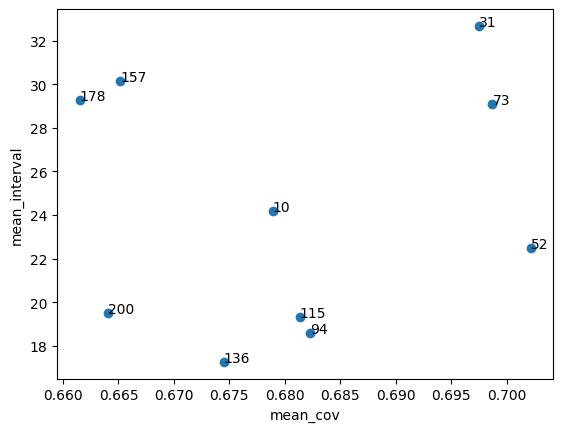

In [8]:
random_data = ACP_data.random_multi_shift(1, (1000, 1500), number_shift_range=(2, 7))

dt_data_as_dependent(random_data)